# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Uploading the training dataset to python environment

In [2]:
train_data = pd.read_csv(r'C:\Users\LINI\Downloads\train_ctrUa4K.csv')

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.shape

(614, 13)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train_data.duplicated().sum()

0

In [8]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Visualization

In [9]:
#Heat Map

C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\3062223959.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)


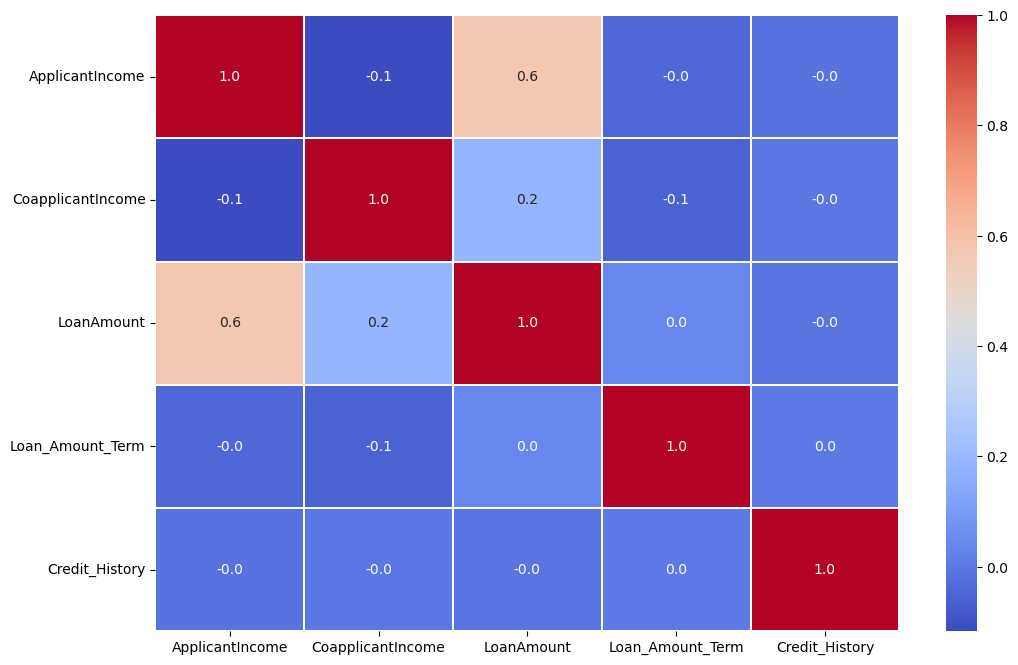

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [11]:
#Bar plot

<Axes: >

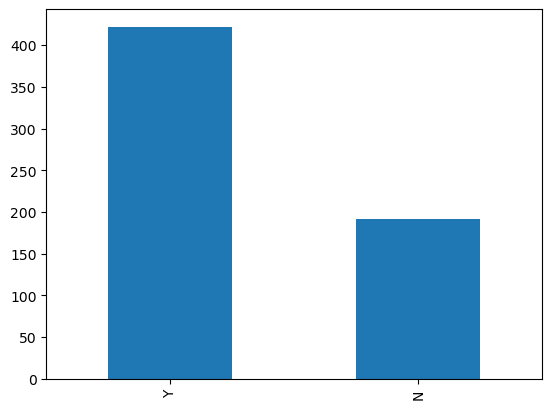

In [12]:
train_data['Loan_Status'].value_counts().plot.bar()

In [13]:
# Missing Value Handling

In [14]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#to check whether the data is normally distributed or not plot histogram

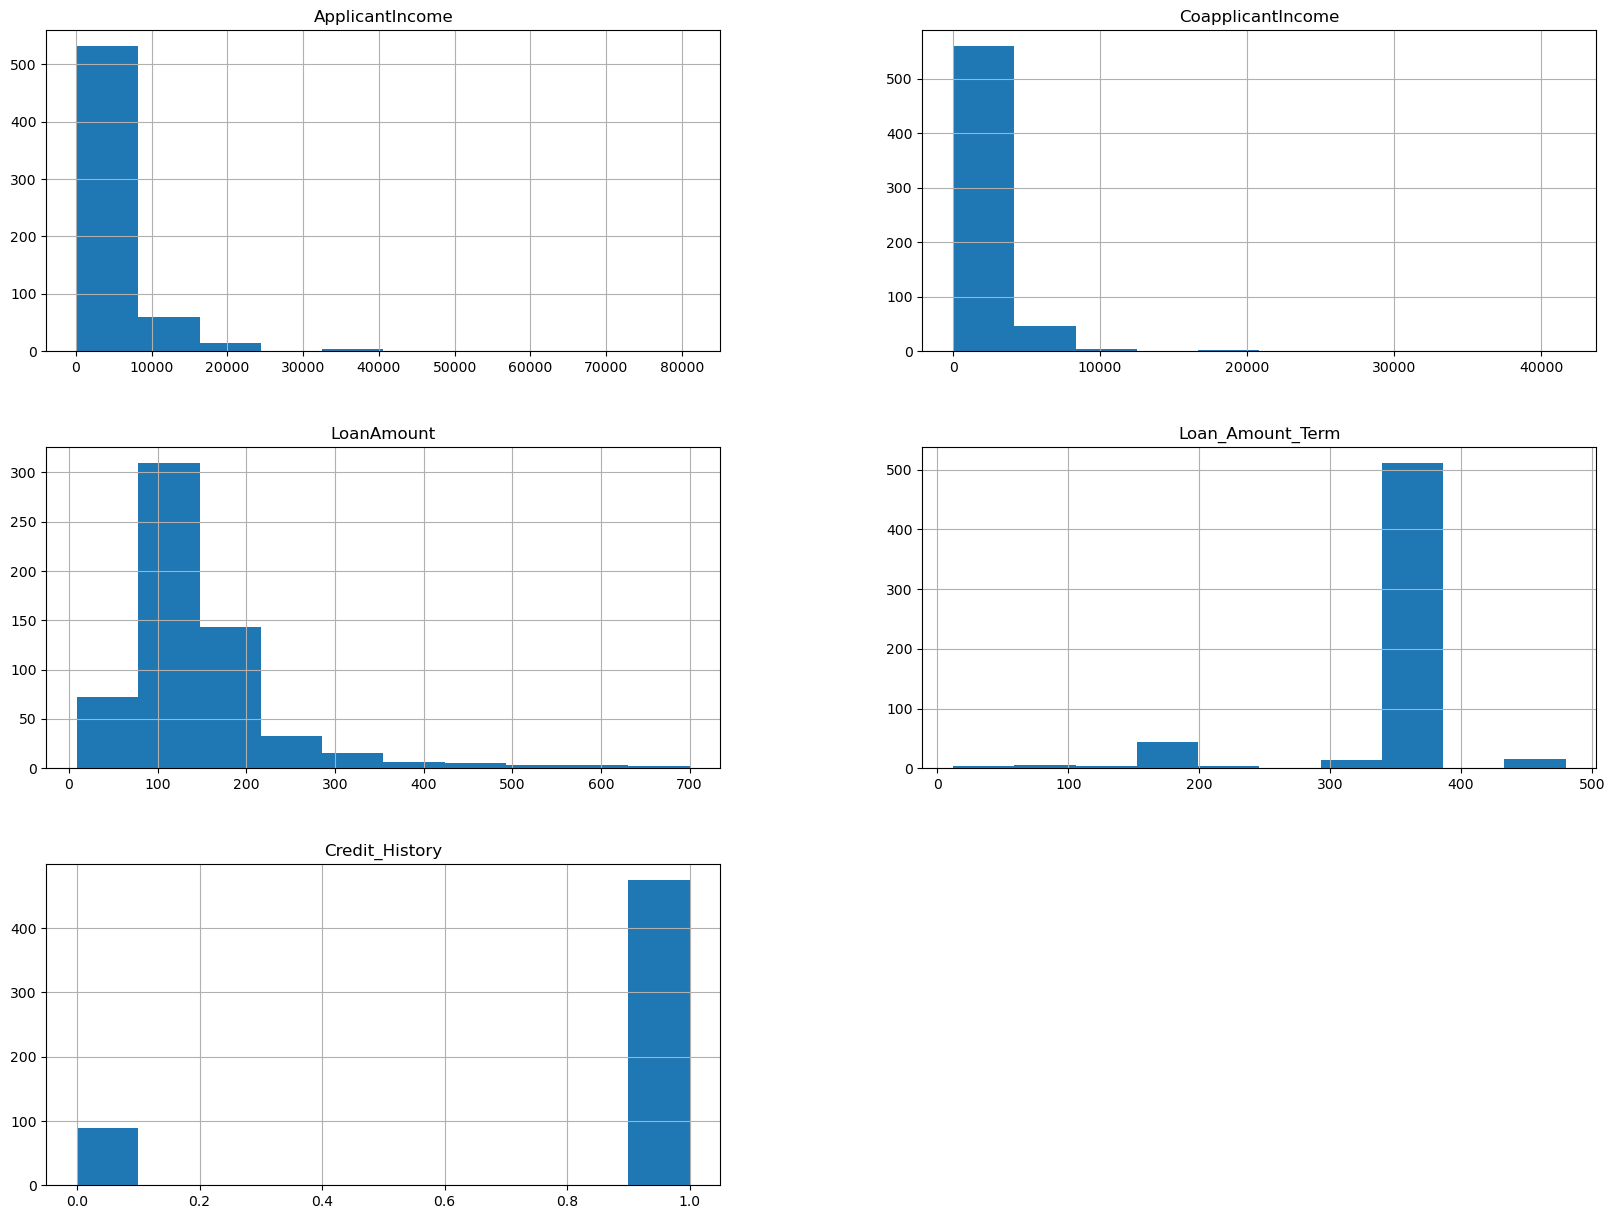

In [16]:
freqgraph =train_data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [17]:
for col in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    train_data[col]=train_data[col].fillna(train_data[col].median())

In [18]:
#train_data['Gender'].fillna('Male', inplace=True)
train_data['Dependents'].fillna(0,inplace=True)
train_data['Married'].fillna('Yes',inplace=True)
train_data['Self_Employed'].fillna('Yes',inplace=True)
train_data['Gender'].fillna( train_data['Gender'].mode(),inplace=True)   
    

In [19]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
#We will be having outliers only in numerical columns

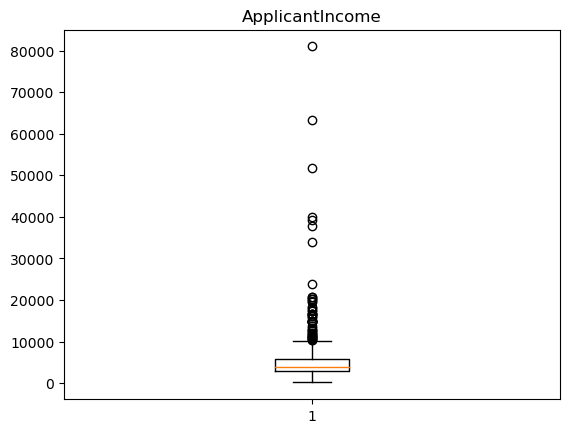

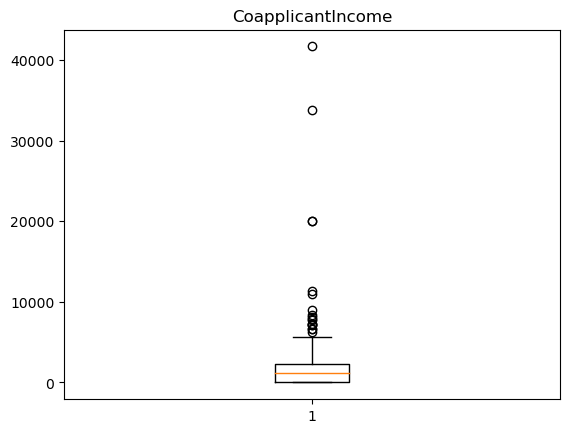

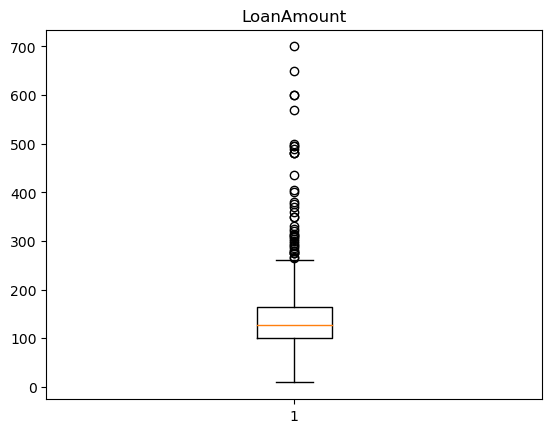

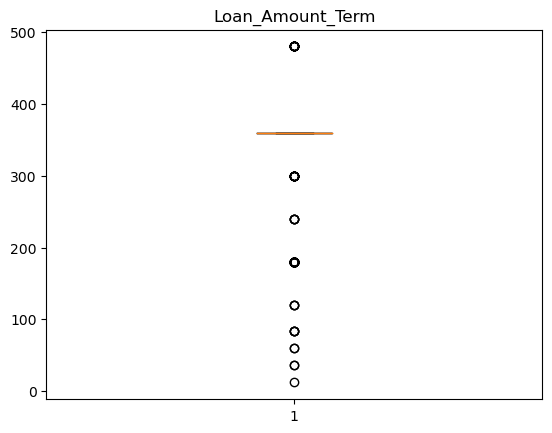

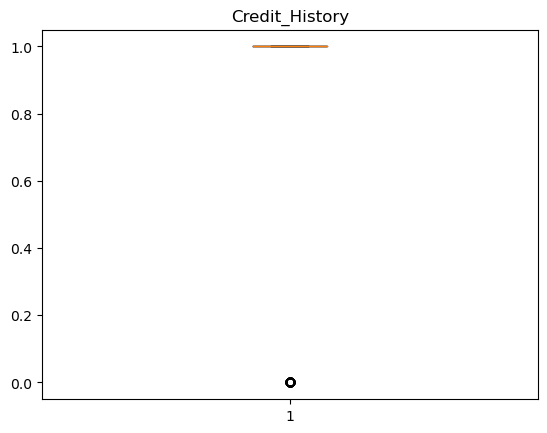

In [21]:
num_cols= ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in num_cols:
    plt.figure()
    plt.boxplot(train_data[i])
    plt.title(i)

# Flooring and Capping for Outlier Handling

In [22]:
#Handling the outliers of' ApplicantIncome '

In [23]:
Q1 = np.percentile(train_data['ApplicantIncome'],25,interpolation='midpoint')
Q2 = np.percentile(train_data['ApplicantIncome'],50,interpolation='midpoint')
Q3 = np.percentile(train_data['ApplicantIncome'],75,interpolation='midpoint')


C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2653450832.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(train_data['ApplicantIncome'],25,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2653450832.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(train_data['ApplicantIncome'],50,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2653450832.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the mode

In [24]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim  = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-1487.5
10156.5


In [25]:
train_data['ApplicantIncome']=np.where(train_data['ApplicantIncome']>up_lim,up_lim,np.where(train_data['ApplicantIncome']<low_lim,low_lim,train_data['ApplicantIncome']))

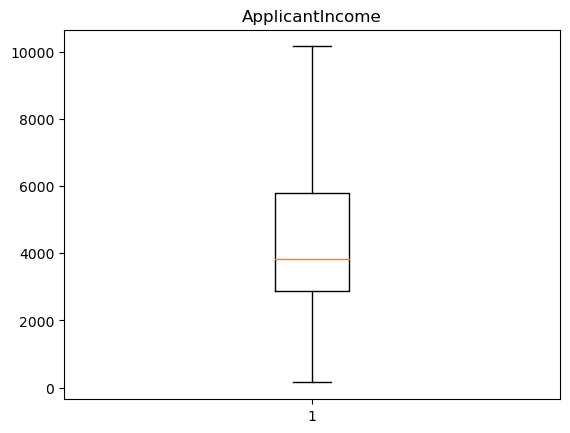

In [26]:
plt.boxplot(train_data['ApplicantIncome'])
plt.title('ApplicantIncome')
plt.show()

In [27]:
 #Handling the outliers of 'CoapplicantIncome'

In [28]:
Q1 = np.percentile(train_data['CoapplicantIncome'],25,interpolation='midpoint')
Q2 = np.percentile(train_data['CoapplicantIncome'],50,interpolation='midpoint')
Q3 = np.percentile(train_data['CoapplicantIncome'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim  = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-3438.75
5731.25


C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2409468487.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(train_data['CoapplicantIncome'],25,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2409468487.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(train_data['CoapplicantIncome'],50,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2409468487.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the 

In [29]:
train_data['CoapplicantIncome']=np.where(train_data['CoapplicantIncome']>up_lim,up_lim,np.where(train_data['CoapplicantIncome']<low_lim,low_lim,train_data['CoapplicantIncome']))

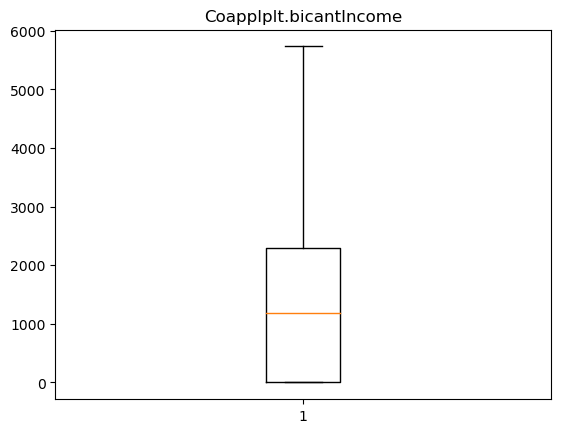

In [30]:
plt.boxplot(train_data['CoapplicantIncome'])
plt.title('Coapplplt.bicantIncome')
plt.show()

In [31]:
#Handling the outliers of' LoanAmount '

In [32]:
Q1 = np.percentile(train_data['LoanAmount'],25,interpolation='midpoint')
Q2 = np.percentile(train_data['LoanAmount'],50,interpolation='midpoint')
Q3 = np.percentile(train_data['LoanAmount'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim  = Q3+1.5*IQR
print(low_lim)
print(up_lim)

4.5
260.5


C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2362052976.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(train_data['LoanAmount'],25,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2362052976.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(train_data['LoanAmount'],50,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2362052976.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest

In [33]:
train_data['LoanAmount']=np.where(train_data['LoanAmount']>up_lim,up_lim,np.where(train_data['LoanAmount']<low_lim,low_lim,train_data['LoanAmount']))

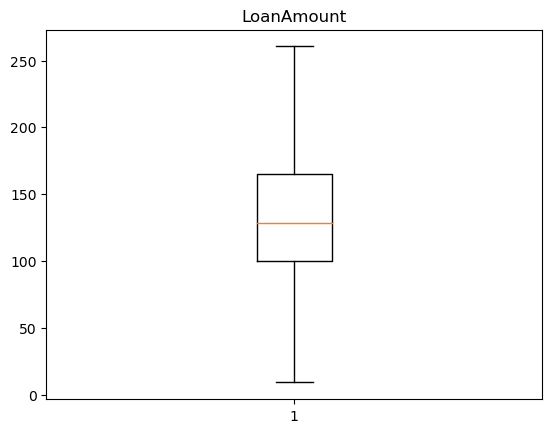

In [34]:
plt.boxplot(train_data['LoanAmount'])
plt.title('LoanAmount')
plt.show()

In [35]:
# Handling the outliers of 'Loan_Amount_Term'

In [36]:
Q1 = np.percentile(train_data['Loan_Amount_Term'],25,interpolation='midpoint')
Q2 = np.percentile(train_data['Loan_Amount_Term'],50,interpolation='midpoint')
Q3 = np.percentile(train_data['Loan_Amount_Term'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim  = Q3+1.5*IQR
print(low_lim)
print(up_lim)

360.0
360.0


C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2548465641.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(train_data['Loan_Amount_Term'],25,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2548465641.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(train_data['Loan_Amount_Term'],50,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2548465641.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the mo

In [37]:
train_data['Loan_Amount_Term']=np.where(train_data['Loan_Amount_Term']>up_lim,up_lim,np.where(train_data['Loan_Amount_Term']<low_lim,low_lim,train_data['Loan_Amount_Term']))

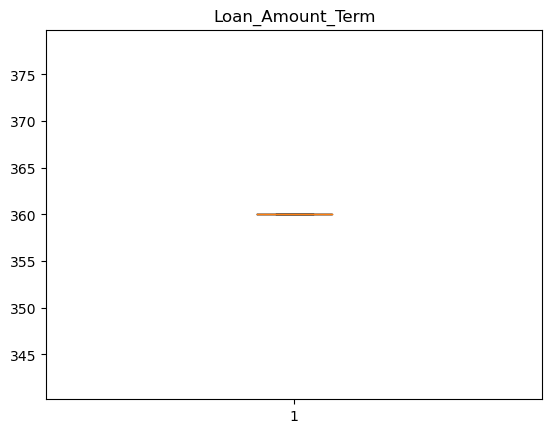

In [38]:
plt.boxplot(train_data['Loan_Amount_Term'])
plt.title('Loan_Amount_Term')
plt.show()

In [39]:
#Handling the outliers of 'Credit_History'

In [40]:
Q1 = np.percentile(train_data['Credit_History'],25,interpolation='midpoint')
Q2 = np.percentile(train_data['Credit_History'],50,interpolation='midpoint')
Q3 = np.percentile(train_data['Credit_History'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim  = Q3+1.5*IQR
print(low_lim)
print(up_lim)

1.0
1.0


C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\1889094167.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(train_data['Credit_History'],25,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\1889094167.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(train_data['Credit_History'],50,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\1889094167.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 

In [41]:
train_data['Credit_History']=np.where(train_data['Credit_History']>up_lim,up_lim,np.where(train_data['Credit_History']<low_lim,low_lim,train_data['Credit_History']))

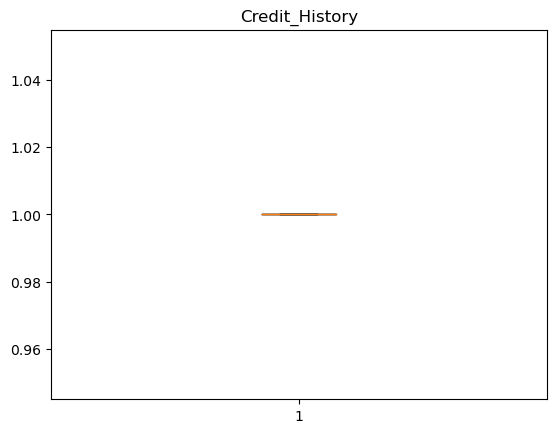

In [42]:
plt.boxplot(train_data['Credit_History'])
plt.title('Credit_History')
plt.show()

# One Hot Encoding

In [43]:
X_train=train_data.drop(['Loan_ID','Loan_Status'],axis=1)

In [44]:
X_train =pd.get_dummies(X_train)

In [45]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583.0,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3000.0,0.0,66.0,360.0,1.0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,2583.0,2358.0,120.0,360.0,1.0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000.0,0.0,141.0,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1


# Uploading the testing dataset to python environment

In [46]:
test_data =  pd.read_csv(r'C:\Users\LINI\Downloads\test_lAUu6dG.csv')

In [47]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [48]:
test_data.shape

(367, 12)

In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [50]:
test_data.duplicated().sum()

0

In [51]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# Data Visualization

In [52]:
# Heat Map

C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\3402748369.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_data.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)


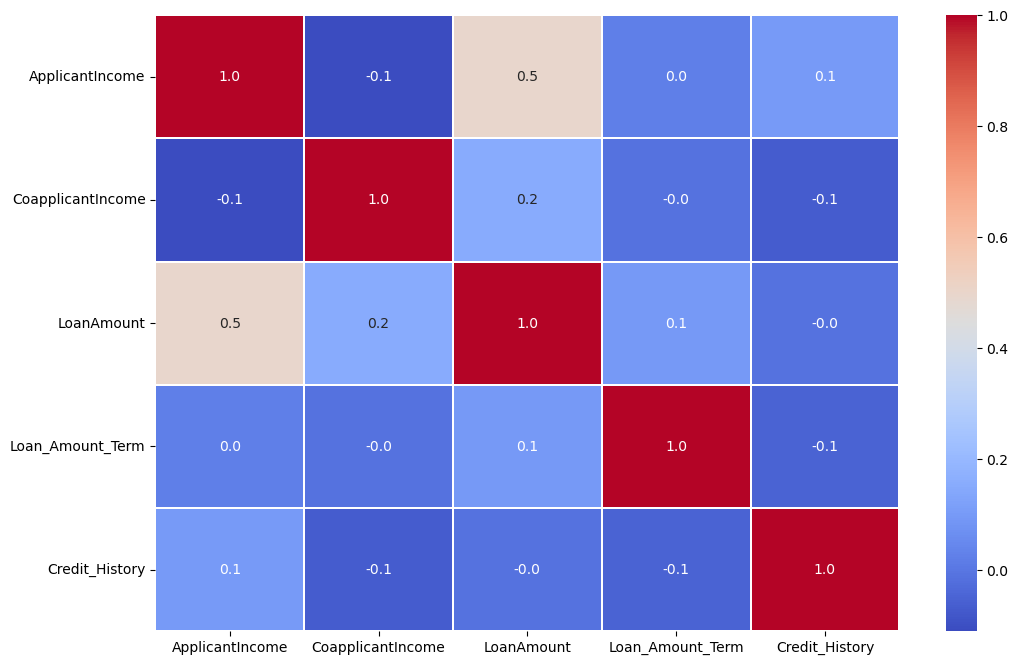

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(test_data.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [54]:
#Bar plot

<Axes: >

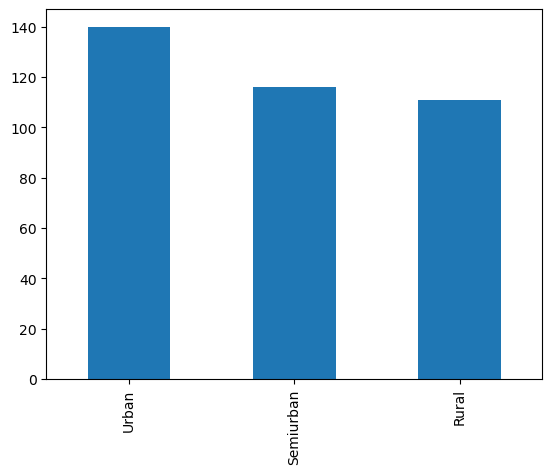

In [55]:
test_data['Property_Area'].value_counts().plot.bar()

In [56]:
# Missing Value Handling

In [57]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [58]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [59]:
#to check whether the data is normally distributed or not plot histogram

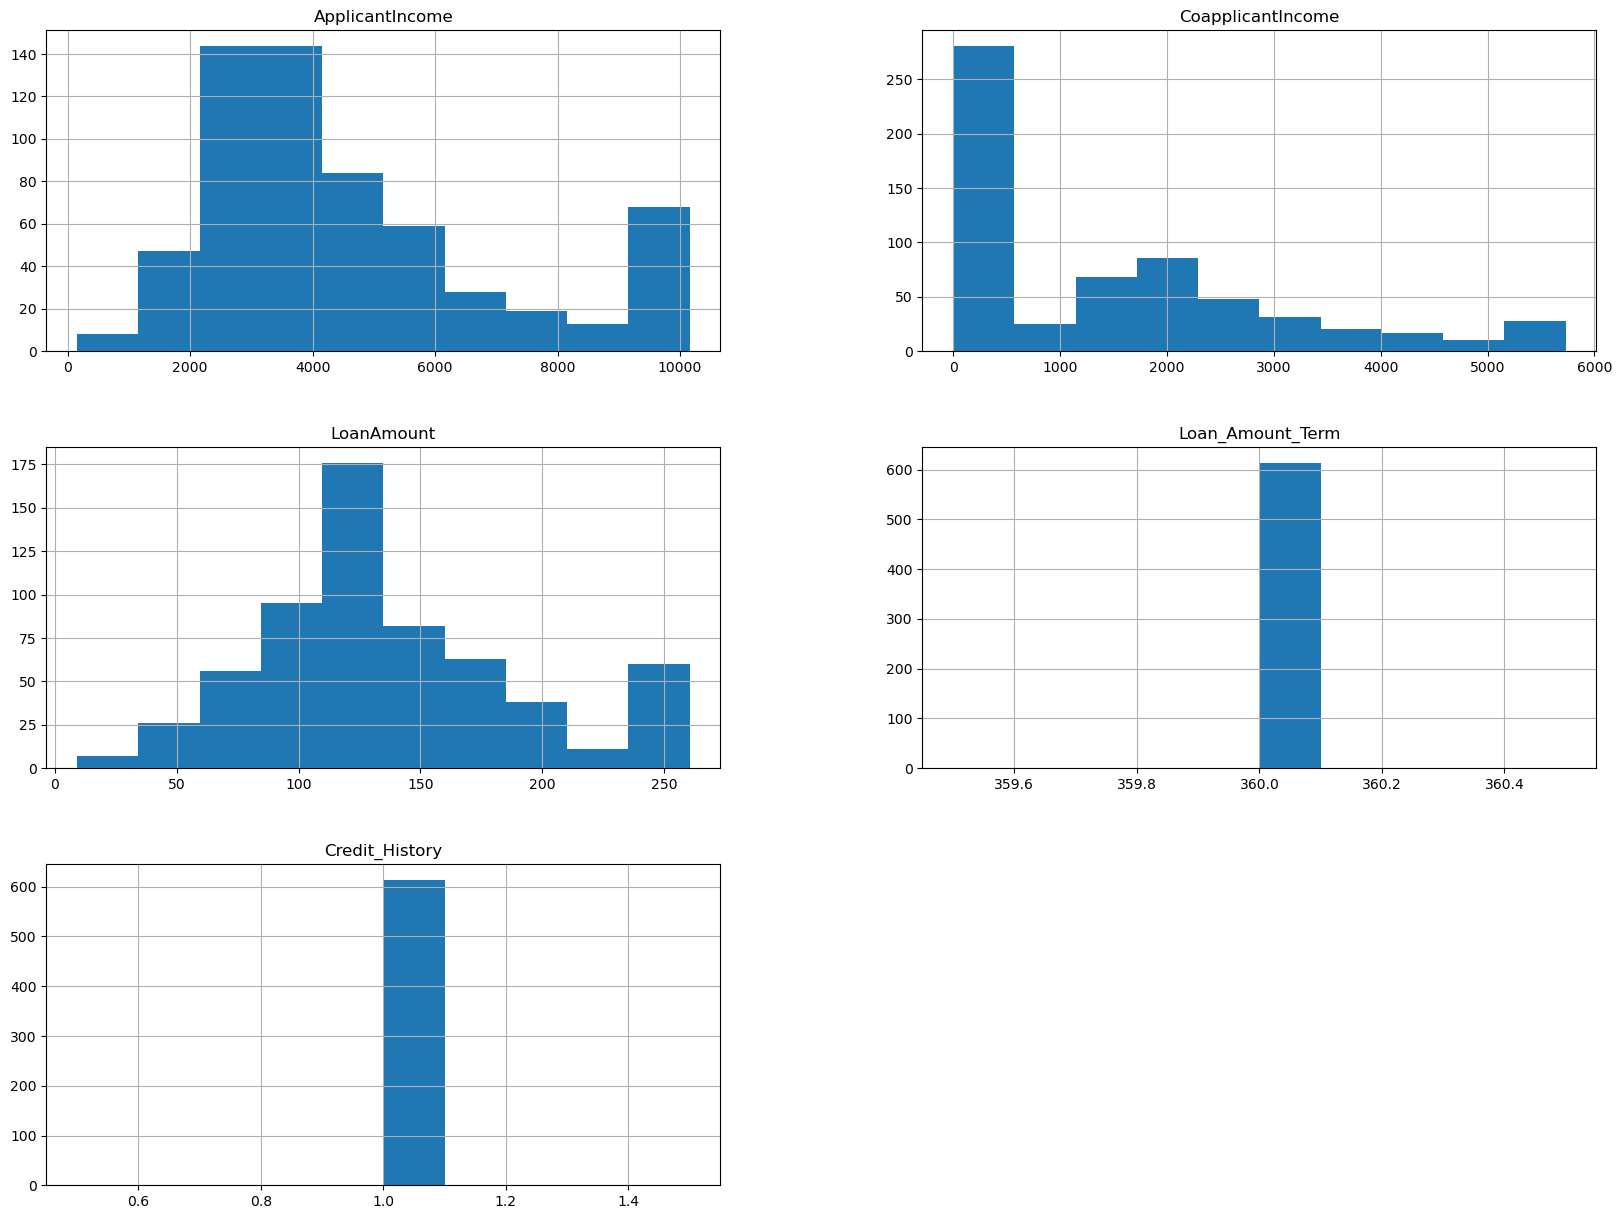

In [60]:
freqgraph =train_data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [61]:
for col in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    test_data[col]=test_data[col].fillna(test_data[col].median())

In [62]:
#test_data['Gender'].fillna('Male', inplace=True)
test_data['Dependents'].fillna(0,inplace=True)
test_data['Married'].fillna('Yes',inplace=True)
test_data['Self_Employed'].fillna('Yes',inplace=True)
test_data['Gender'].fillna(test_data['Gender'].mode(),inplace=True)   
    

In [63]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [64]:
#We will be having outliers only in numerical columns

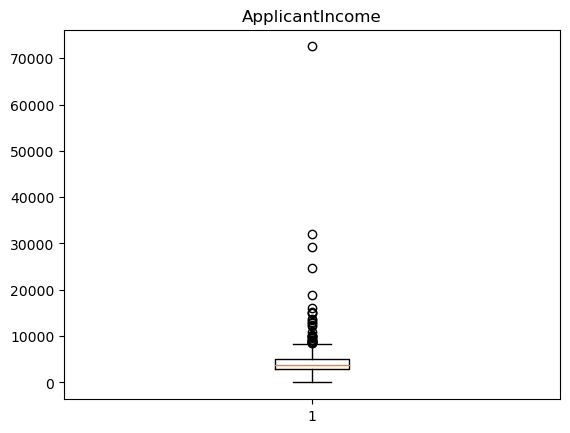

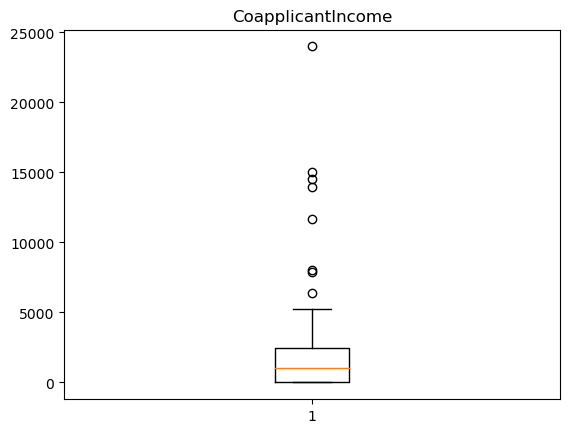

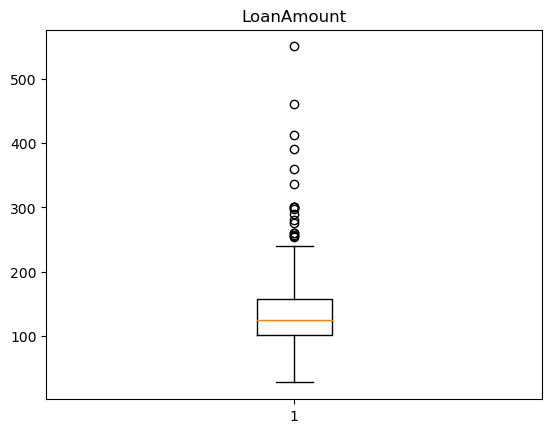

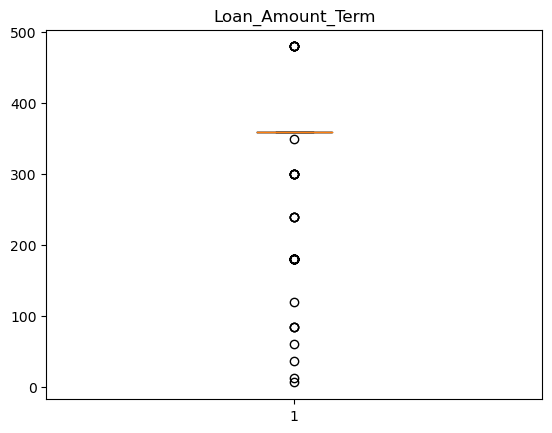

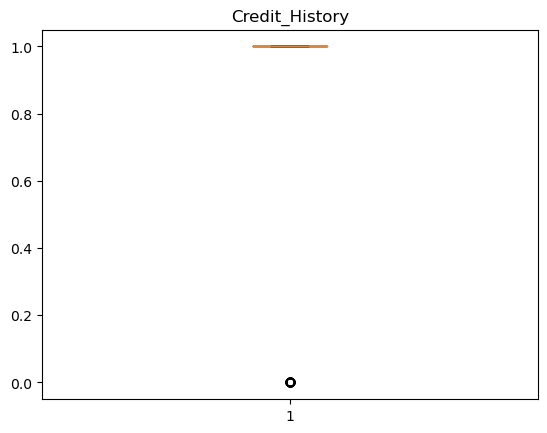

In [65]:
num_cols= ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in num_cols:
    plt.figure()
    plt.boxplot(test_data[i])
    plt.title(i)

# Flooring and Capping for Outlier Handling

In [66]:
#Handling the outliers of' ApplicantIncome '

In [67]:
Q1 = np.percentile(test_data['ApplicantIncome'],25,interpolation='midpoint')
Q2 = np.percentile(test_data['ApplicantIncome'],50,interpolation='midpoint')
Q3 = np.percentile(test_data['ApplicantIncome'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim  = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-430.0
8354.0


C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\4077182408.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(test_data['ApplicantIncome'],25,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\4077182408.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(test_data['ApplicantIncome'],50,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\4077182408.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 

In [68]:
test_data['ApplicantIncome']=np.where(test_data['ApplicantIncome']>up_lim,up_lim,np.where(test_data['ApplicantIncome']<low_lim,low_lim,test_data['ApplicantIncome']))

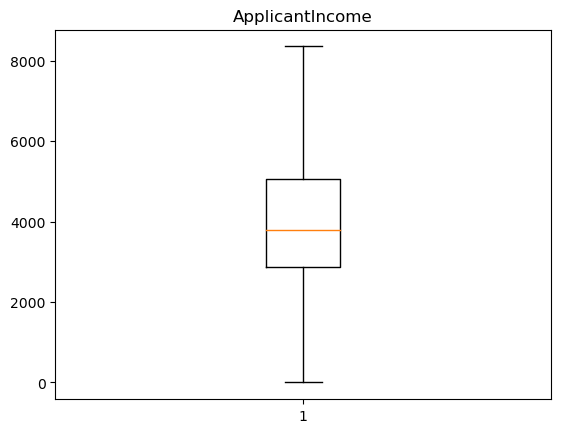

In [69]:
plt.boxplot(test_data['ApplicantIncome'])
plt.title('ApplicantIncome')
plt.show()

In [70]:
#Handling the outliers of' CopplicantIncome '

In [71]:
Q1 = np.percentile(test_data['CoapplicantIncome'],25,interpolation='midpoint')
Q2 = np.percentile(test_data['CoapplicantIncome'],50,interpolation='midpoint')
Q3 = np.percentile(test_data['CoapplicantIncome'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim  = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-3645.75
6076.25


C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2653511227.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(test_data['CoapplicantIncome'],25,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2653511227.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(test_data['CoapplicantIncome'],50,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2653511227.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the mo

In [72]:
test_data['CoapplicantIncome']=np.where(test_data['CoapplicantIncome']>up_lim,up_lim,np.where(test_data['CoapplicantIncome']<low_lim,low_lim,test_data['CoapplicantIncome']))

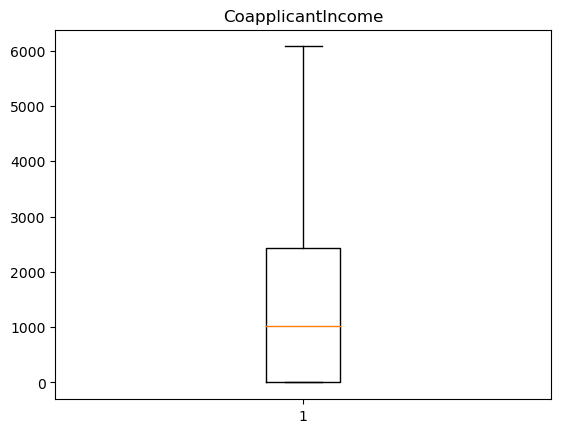

In [73]:
plt.boxplot(test_data['CoapplicantIncome'])
plt.title('CoapplicantIncome')
plt.show()


In [74]:
#Handling the outliers of' LoanAmount '

In [75]:
Q1 = np.percentile(test_data['LoanAmount'],25,interpolation='midpoint')
Q2 = np.percentile(test_data['LoanAmount'],50,interpolation='midpoint')
Q3 = np.percentile(test_data['LoanAmount'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim  = Q3+1.5*IQR
print(low_lim)
print(up_lim)

16.25
242.25


C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2207600507.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(test_data['LoanAmount'],25,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2207600507.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(test_data['LoanAmount'],50,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\2207600507.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest',

In [76]:
test_data['LoanAmount']=np.where(test_data['LoanAmount']>up_lim,up_lim,np.where(test_data['LoanAmount']<low_lim,low_lim,test_data['LoanAmount']))

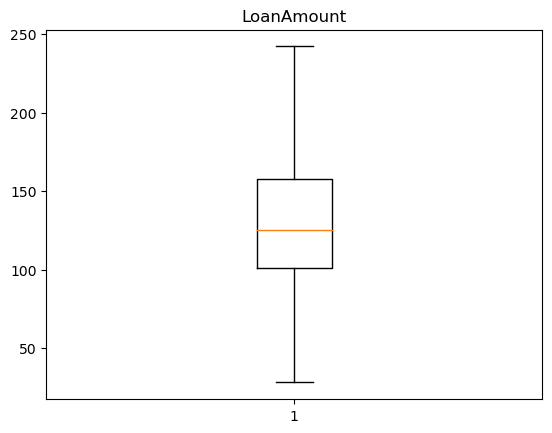

In [77]:
plt.boxplot(test_data['LoanAmount'])
plt.title('LoanAmount')
plt.show()

In [78]:
#Handling the outliers of 'Loan_Amount_Term'

In [79]:
Q1 = np.percentile(test_data['Loan_Amount_Term'],25,interpolation='midpoint')
Q2 = np.percentile(test_data['Loan_Amount_Term'],50,interpolation='midpoint')
Q3 = np.percentile(test_data['Loan_Amount_Term'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim  = Q3+1.5*IQR
print(low_lim)
print(up_lim)

360.0
360.0


C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\3783321525.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(test_data['Loan_Amount_Term'],25,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\3783321525.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(test_data['Loan_Amount_Term'],50,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\3783321525.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the mode

In [80]:
test_data['Loan_Amount_Term']=np.where(test_data['Loan_Amount_Term']>up_lim,up_lim,np.where(test_data['Loan_Amount_Term']<low_lim,low_lim,test_data['Loan_Amount_Term']))

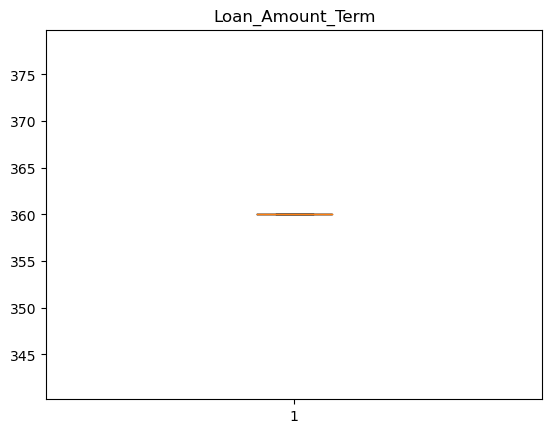

In [81]:
plt.boxplot(test_data['Loan_Amount_Term'])
plt.title('Loan_Amount_Term')
plt.show()

In [82]:
#Handling the outliers of 'Credit_History'

In [83]:
Q1 = np.percentile(train_data['Credit_History'],25,interpolation='midpoint')
Q2 = np.percentile(train_data['Credit_History'],50,interpolation='midpoint')
Q3 = np.percentile(train_data['Credit_History'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim  = Q3+1.5*IQR
print(low_lim)
print(up_lim)

1.0
1.0


C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\1889094167.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(train_data['Credit_History'],25,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\1889094167.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(train_data['Credit_History'],50,interpolation='midpoint')
C:\Users\LINI\AppData\Local\Temp\ipykernel_7952\1889094167.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 

In [84]:
test_data['Credit_History']=np.where(test_data['Credit_History']>up_lim,up_lim,np.where(test_data['Credit_History']<low_lim,low_lim,test_data['Credit_History']))

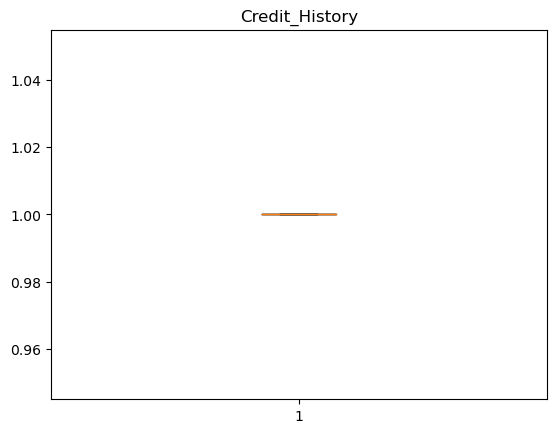

In [85]:
plt.boxplot(test_data['Credit_History'])
plt.title('Credit_History')
plt.show()

# One Hot Encoding

In [86]:
X_test=test_data.drop(['Loan_ID'],axis=1)

In [87]:
X_test =pd.get_dummies(X_train)

In [88]:
X_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583.0,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3000.0,0.0,66.0,360.0,1.0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,2583.0,2358.0,120.0,360.0,1.0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000.0,0.0,141.0,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1


# Logistic Regression model Creation

In [89]:
y_train=train_data['Loan_Status']

In [90]:
from sklearn.linear_model import LogisticRegression              
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred_lr=logit_model.predict(X_test)

In [91]:
sample_data=pd.read_csv(r'C:\Users\LINI\Downloads\sample_submission_49d68Cx.csv')


In [92]:
sample_data.shape

(367, 2)

In [93]:
sample_data.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [94]:
sample_data['Loan_Status']=y_pred_lr

ValueError: Length of values (614) does not match length of index (367)

In [ ]:
sample_data.head()

# KNN model for train data

In [95]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn = classifier.predict(X_test)

In [96]:
sample_data['Loan_Status']=y_pred_knn

ValueError: Length of values (614) does not match length of index (367)

In [ ]:
sample_data.head()

# SVM model for train data

In [ ]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(X_train,y_train)

In [ ]:
y_pred_svm=svmclf.predict(X_test)

In [ ]:
sample_data['Loan_Status']=y_pred_svm

In [ ]:
sample_data.head()

# Decision tree model for train data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred_tree=dt_clf.predict(X_test)

In [ ]:
sample_data['Loan_Status']=y_pred_tree

In [ ]:
sample_data.head()

# Random forest model for train data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

In [ ]:
y_pred_rf=rf_clf.predict(X_test)

In [ ]:
sample_data['Loan_Status']=y_pred_rf

In [ ]:
sample_data.head()